In [1]:
%reset -f
print('Hello Python')

Hello Python


In [2]:
%reset -f
frame = 1205
for _ in range(20):
  af = frame %4
  print(f'frame = {frame}   af = {af}')
  frame += 1

frame = 1205   af = 1
frame = 1206   af = 2
frame = 1207   af = 3
frame = 1208   af = 0
frame = 1209   af = 1
frame = 1210   af = 2
frame = 1211   af = 3
frame = 1212   af = 0
frame = 1213   af = 1
frame = 1214   af = 2
frame = 1215   af = 3
frame = 1216   af = 0
frame = 1217   af = 1
frame = 1218   af = 2
frame = 1219   af = 3
frame = 1220   af = 0
frame = 1221   af = 1
frame = 1222   af = 2
frame = 1223   af = 3
frame = 1224   af = 0


In [2]:
%reset -f
import os
import requests

# フォルダが存在しなければ作成
dir = 'data/download/'
if not os.path.isdir(dir):
  os.makedirs(dir)

fn = 'char-chip-01.png'
url = 'http://dispell.net/th/char_th0012.png'
res = requests.get(url)

if res.status_code != 200:
  raise Exception(f'ファイル {url} の取得に失敗。強制終了します。Code:{res.status_code}')
else :
  with open(f'{dir}/{fn}','wb') as file: 
    file.write(res.content)
  print(f'{dir} に {fn} を保存しました')

data/download/ に char-chip-01.png を保存しました


In [3]:
%reset -f
import os
import requests

# フォルダが存在しなければ作成
dir = 'data/download/'
if not os.path.isdir(dir):
  os.makedirs(dir)

fn = 'char-chip-02.png'
url = 'http://dispell.net/img/v4_yukkuri.png'
res = requests.get(url)

if res.status_code != 200:
  raise Exception(f'ファイル {url} の取得に失敗。強制終了します。Code:{res.status_code}')
else :
  with open(f'{dir}/{fn}','wb') as file: 
    file.write(res.content)
  print(f'{dir} に {fn} を保存しました')

data/download/ に char-chip-02.png を保存しました


横 288 px , 縦 256 px


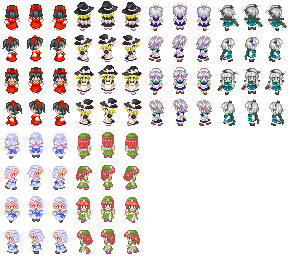

In [4]:
%reset -f
import cv2
from IPython.display import Image

path = 'data/download/' + 'char-chip-01.png'
img = cv2.imread(path)
height, width, _ = img.shape  # アンパック
print(f'横 {width} px , 縦 {height} px')
Image(open(path,'rb').read())

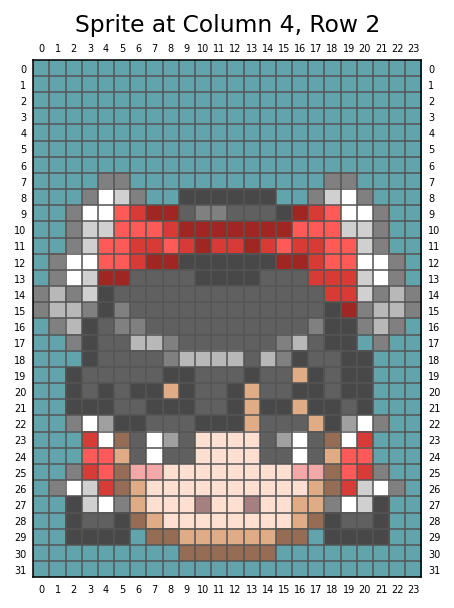

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# スプライトシートの設定
dir = 'data/download/'
fn = 'char-chip-02.png'
path = dir + fn
raw = cv2.imread(path)  # スプライトシートの読み込み

# 各スプライトの幅と高さ (ピクセル)
sprite_width = 24
sprite_height = 32

def extract_sprite(raw_image, col, row, sprite_width, sprite_height):
    """
    data/download/
    fn = 'char-chip-01.png
    
    """
    x_start = col * sprite_width
    y_start = row * sprite_height
    x_end = x_start + sprite_width
    y_end = y_start + sprite_height
    return raw_image[y_start:y_end, x_start:x_end]

# 任意のスプライトの位置を指定 (例: 横位置4, 縦位置2)
selected_col = 4  # ゼロオリジンでの列番号
selected_row = 2  # ゼロオリジンでの行番号

# スプライトを抽出
sprite = extract_sprite(raw, selected_col, selected_row,
                        sprite_width, sprite_height)
height, width, _ = sprite.shape

# 抽出したスプライトの可視化
fig, ax = plt.subplots(dpi=140)
ax.imshow(cv2.cvtColor(sprite, cv2.COLOR_BGR2RGB), interpolation='nearest')
ax.set_xlim(-0.5, width - 0.5)
ax.set_ylim(height - 0.5, -0.5)

# 主目盛の設定
plt.tick_params(length=0, labeltop=True, labelright=True)
ax.set_xticks(np.arange(0, width))
ax.set_xticklabels(np.arange(0, width), fontsize=5)
ax.set_yticks(np.arange(0, height))
ax.set_yticklabels(np.arange(0, height), fontsize=5)

# 副主目盛の設定
plt.tick_params(which='minor', length=0, labeltop=True, labelright=True)
ax.set_xticks(np.arange(0.5, width - 0.5, 1), minor=True)
ax.set_yticks(np.arange(0.5, height - 0.5, 1), minor=True)

# グリッド設定と表示
ax.grid(which='minor', color='#555')
plt.title(f"Sprite at Column {selected_col}, Row {selected_row}")
plt.show()

raw.shape => (256, 288, 4)
data/img/marisa.png に画像を出力しました。


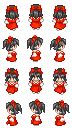

In [9]:
%reset -f
import os
import cv2
import numpy as np
from IPython.display import Image

# 入力画像のパス設定 (Path設定)
input_path = 'data/download/' + 'char-chip-01.png'

# 出力画像のパス設定 (Path設定)
output_fn = 'marisa.png'
output_dir = 'data/img/'
output_path = output_dir + output_fn

# 出力フォルダが存在しなければ作成
if not os.path.isdir(output_dir):
  os.makedirs(output_dir)

# 画像読込み、切り出し範囲の設定
img = cv2.imread(input_path,cv2.IMREAD_UNCHANGED) # アルファチャンネルも読み込む
print(f'raw.shape => {img.shape}')
bw = 24  # BaseWidth 
bh = 32  # BaseHeight
offset_w = bw*0
offset_h = bh*0

# 画像の切り出しと保存処理
img = img[offset_h:offset_h+bh*4, offset_w:offset_w+bw*3]
cv2.imwrite(output_path,img)
print(f'{output_path} に画像を出力しました。')

# 出力画像の確認
Image(open(output_path,'rb').read())

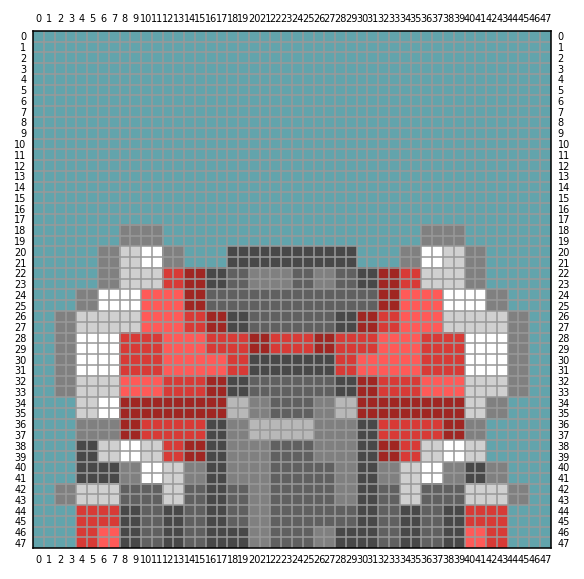

True

In [10]:
# 画像の詳細確認
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像のパス設定 (Path設定)
input_dir = 'data/download/'
input_fn = 'char-chip-02.png'
input_path = input_dir + input_fn

# 出力画像のパス設定 (Path設定)
output_dir = 'data/img/'
output_fn = 'marisa-face.png'
output_path = output_dir + output_fn

# アルファチャンネルを含めて画像読込み
raw = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

# 画像の範囲切り出しと拡大
img = raw[0:24,0:24] # ■■ 要修正
img = cv2.resize(img,(48,48),interpolation=cv2.INTER_NEAREST)
height, width, _ = img.shape

# 可視化に関する処理
fig,ax = plt.subplots(dpi=140)
ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),interpolation='nearest')
ax.set_xlim(-0.5,width-0.5)
ax.set_ylim(height-0.5,-0.5)

# 主目盛の設定
plt.tick_params(length=0, labeltop=True, labelright=True )
ax.set_xticks(np.arange(0, width))
ax.set_xticklabels(np.arange(0, width),fontsize=5)
ax.set_yticks(np.arange(0, height))
ax.set_yticklabels(np.arange(0, height),fontsize=5)

# 副主目盛の設定
plt.tick_params(which='minor', 
                length=0, labeltop=True, labelright=True )
ax.set_xticks(np.arange(0.5, width-0.5,1), minor=True)
ax.set_yticks(np.arange(0.5, height-0.5,1), minor=True)

# グリッド設定と表示
ax.grid(which='minor', color='#999')
plt.show()

# 保存
cv2.imwrite(output_path,img)